In [50]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

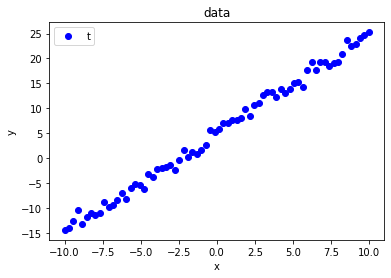

In [58]:
N = 70
X = np.linspace(-10,10,N)
Y = X * 2 + 5 + np.random.randn(N)

plt.title('data')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.plot(X,Y,"ob")  
plt.legend("test")  
plt.show()  

In [59]:
w = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

epochs = 240

lr = 0.01

###计算公式：
采用公式求梯度
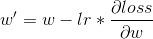
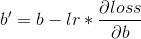
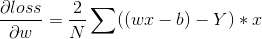
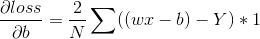

In [60]:
for epoch in range(epochs):
    current_w, current_b = 0., 0.
    for i in range(0, N):
        current_w = current_w + 2/N * (w * X[i] + b - Y[i])* X[i]
        current_b = current_b + 2/N * (w * X[i] + b - Y[i])
    w = w - lr * current_w
    b = b - lr * current_b
    if epoch % 40 == 0:
        current_loss = 0.
        for j in range(0, N):
            current_loss = current_loss + 1/N * (w * X[i] + b -Y[i])**2
        print('epoch :',epoch, 'current_loss:', current_loss)

epoch : 0 current_loss: tf.Tensor([132.8789], shape=(1,), dtype=float32)
epoch : 40 current_loss: tf.Tensor([6.446774], shape=(1,), dtype=float32)
epoch : 80 current_loss: tf.Tensor([1.7266585], shape=(1,), dtype=float32)
epoch : 120 current_loss: tf.Tensor([0.5898707], shape=(1,), dtype=float32)
epoch : 160 current_loss: tf.Tensor([0.2752881], shape=(1,), dtype=float32)
epoch : 200 current_loss: tf.Tensor([0.17323712], shape=(1,), dtype=float32)


In [61]:
print('last weight w={0} and b={1}'.format(w,b))

last weight w=[1.9871129] and b=[5.020114]


In [68]:
w1 = tf.Variable(tf.zeros([1]),dtype=tf.float32)
b1 = tf.Variable(tf.zeros([1]),dtype=tf.float32)

In [69]:
epochs = 80
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, N):
        with tf.GradientTape(persistent=True) as tape:
            loss = tf.square(w1* X[i] + b1  - Y[i])
        grads_w = tape.gradient(loss, w1)
        w1.assign_sub(lr * grads_w)
        grads_b = tape.gradient(loss, b1)
        b1.assign_sub(lr * grads_b)
        total_loss +=loss
    if epoch % 10 == 0 or epoch == 20:
        print('epoch :',epoch, 'current_loss:', total_loss.numpy()/N)

epoch : 0 current_loss: [19.404888]
epoch : 10 current_loss: [1.5112693]
epoch : 20 current_loss: [1.5059667]
epoch : 30 current_loss: [1.5059394]
epoch : 40 current_loss: [1.5059394]
epoch : 50 current_loss: [1.5059394]
epoch : 60 current_loss: [1.5059394]
epoch : 70 current_loss: [1.5059394]


In [70]:
print('last weight w={0} and b={1}'.format(w1.numpy(),b1.numpy()))

last weight w=[2.019475] and b=[4.9104524]
